# Data Understanding

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

from sklearn.preprocessing import StandardScaler

In [72]:
users = pd.read_csv("dataset/users.csv", index_col=0)

In [73]:
users.head()

,name,lang,bot,created_at,statuses_count
id,,,,,
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0


In [74]:
users.shape

(11508, 5)

In [75]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11507 non-null  object 
 1   lang            11508 non-null  object 
 2   bot             11508 non-null  int64  
 3   created_at      11508 non-null  object 
 4   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 539.4+ KB


In [76]:
print("Number of different users' indexes", len(set(users.index)))

Number of different users' indexes 11508


## Name

show the records with Null names

In [77]:
users[users.name.isna()]

,name,lang,bot,created_at,statuses_count
id,,,,,
2166124159,NaN,en,0,2018-11-02 06:39:14,6566.0


In [78]:
null_names_ids = users.name.isna()

## Lang

In [79]:
null_lang_ids = users.lang.isna()

print(np.sum(null_lang_ids))

0


In [80]:
users.lang.unique()

array(['en', 'it', 'fr', 'ru', 'es', 'tr', 'en-gb', 'pt', 'nl', 'id',
       'zh-tw', 'ja', 'de', 'ko', 'en-AU', 'da', 'ar', 'en-GB',
       'Select Language...', 'zh-TW', 'zh-cn', 'pl', 'el', 'fil', 'sv',
       'xx-lc'], dtype=object)

In [81]:
len(users.lang.unique())

26

In [82]:
users.lang.value_counts()

en                    9970
it                     906
es                     319
pt                      65
en-gb                   50
ru                      42
fr                      36
ja                      33
zh-tw                   17
tr                      14
id                      12
ko                       9
de                       8
nl                       6
en-GB                    4
ar                       3
zh-TW                    3
da                       2
Select Language...       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

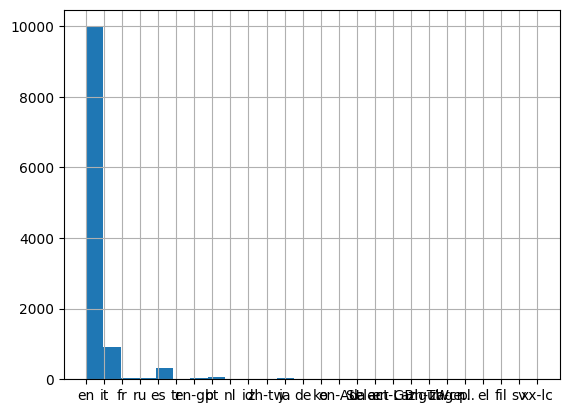

In [83]:
users.lang.hist(bins=26)
plt.show()

In [84]:
# clean lang feature, remove lang id that are not correct

# remove dialectic specialization

def remove_specialization(sample):
    radix = sample.split("-")[0]
    return radix

users.lang = users.lang.apply(remove_specialization)

print(users.lang.value_counts())

en                    10025
it                      906
es                      319
pt                       65
ru                       42
fr                       36
ja                       33
zh                       21
tr                       14
id                       12
ko                        9
de                        8
nl                        6
ar                        3
da                        2
Select Language...        2
pl                        1
el                        1
fil                       1
sv                        1
xx                        1
Name: lang, dtype: int64


In [116]:
# "Select Language..." to "en"
users.loc[users.lang == "Select Language...", "lang"] = "en"

# "xx" to "en"
users.loc[users.lang == "xx", "lang"] = "en"

In [117]:
print(users.lang.value_counts())

en     10028
it       906
es       319
pt        65
ru        42
fr        36
ja        33
zh        21
tr        14
id        12
ko         9
de         8
nl         6
ar         3
da         2
pl         1
el         1
fil        1
sv         1
Name: lang, dtype: int64


## Bot

In [87]:
na_bot_ids = users.bot.isna()
print("Number of Nan Bot: ", np.sum(na_bot_ids))

Number of Nan Bot:  0


In [88]:
users.bot.unique()

array([1, 0])

In [89]:
users.bot.value_counts()

1    6116
0    5392
Name: bot, dtype: int64

## Created_at

In [90]:
na_created_at_ids = users.created_at.isna()
print("Number of Nan created_at: ", np.sum(na_created_at_ids))

Number of Nan created_at:  0


In [91]:
try:
    pd.to_datetime(users['created_at'], format='%Y-%m-%d %H:%M:%S', errors='raise')
    # do something
    print("All the dates are ok!")
except ValueError as e:
    print(e)


All the dates are ok!


In [92]:
users.created_at.min()

'2012-01-24 01:57:38'

In [93]:
users.created_at.max()

'2020-04-21 07:28:31'

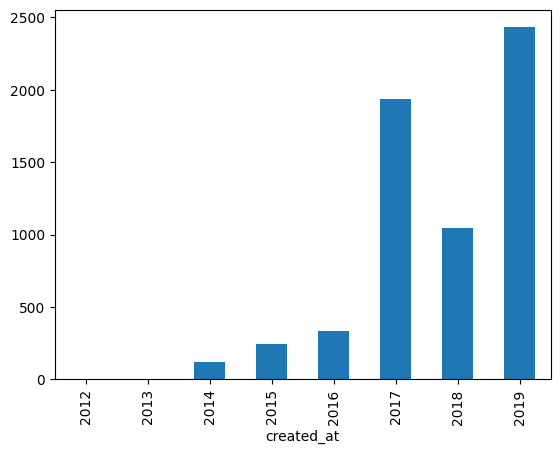

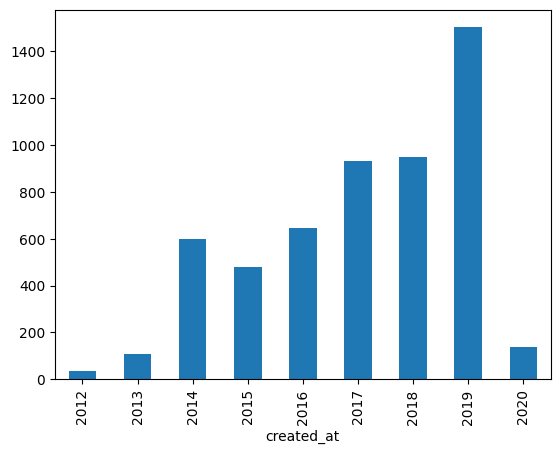

In [94]:
# TODO: aggiustare plot

users[users.bot == 1].name.groupby(pd.to_datetime(users['created_at'], format='%Y-%m-%d %H:%M:%S', errors='raise').dt.year).count().plot(kind="bar")
plt.show()

users[users.bot == 0].name.groupby(pd.to_datetime(users['created_at'], format='%Y-%m-%d %H:%M:%S', errors='raise').dt.year).count().plot(kind="bar")
plt.show()

## Statuses_count

In [95]:
null_statuses_count_ids = users.statuses_count.isna()

print("number of nan statuses counts: ", np.sum(null_statuses_count_ids))

number of nan statuses counts:  399


In [96]:
users.statuses_count[~null_statuses_count_ids].describe()

count     11109.000000
mean       5883.312359
std       19073.007305
min           0.000000
25%          41.000000
50%          68.000000
75%        2916.000000
max      399555.000000
Name: statuses_count, dtype: float64

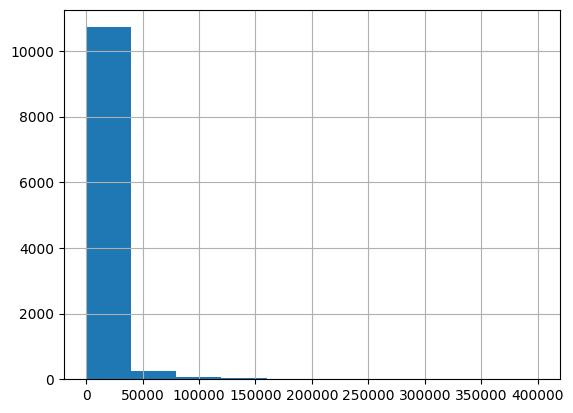

In [97]:
users.statuses_count[~null_statuses_count_ids].hist()
plt.show()

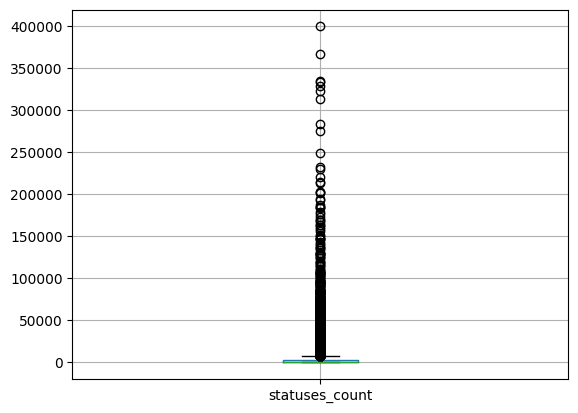

In [98]:
pd.DataFrame(users.statuses_count[~null_statuses_count_ids]).boxplot()
plt.show()

<AxesSubplot: >

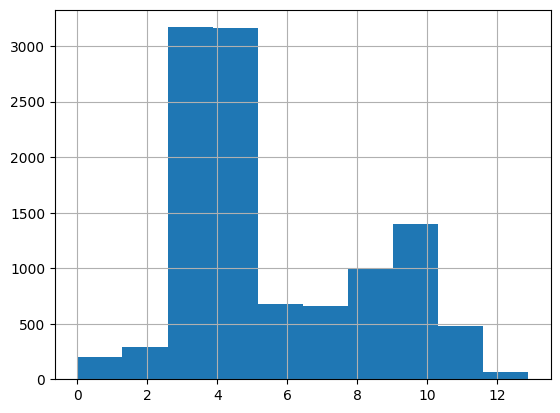

In [99]:
log_feature = pd.Series(np.log(users.statuses_count[~null_statuses_count_ids] + 1))
log_feature.hist()

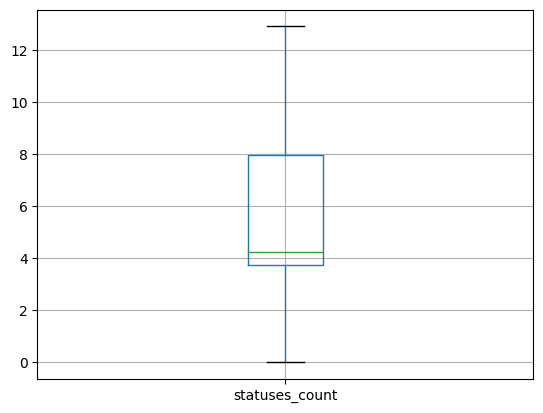

In [100]:
pd.DataFrame(log_feature).boxplot()
plt.show()

In [101]:
users[users.bot == 0].statuses_count[~null_statuses_count_ids].describe()

count      4993.000000
mean      11638.219107
std       26719.438432
min           0.000000
25%          61.000000
50%        2041.000000
75%       11585.000000
max      399555.000000
Name: statuses_count, dtype: float64

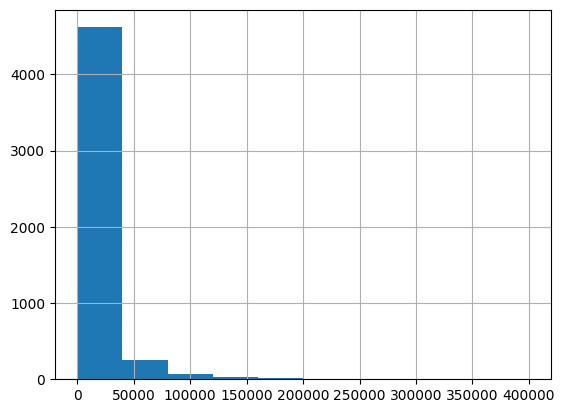

In [102]:
users[users.bot == 0].statuses_count[~null_statuses_count_ids].hist()
plt.show()

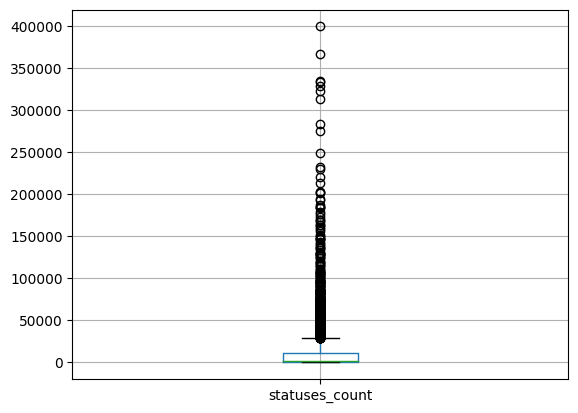

In [103]:
pd.DataFrame(users[users.bot == 0].statuses_count[~null_statuses_count_ids]).boxplot()
plt.show()

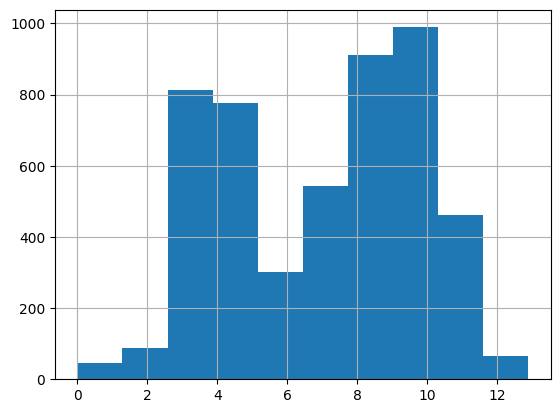

In [104]:
log_feature_nobot = pd.Series(np.log(users[users.bot == 0].statuses_count[~null_statuses_count_ids] + 1))
log_feature_nobot.hist()
plt.show()

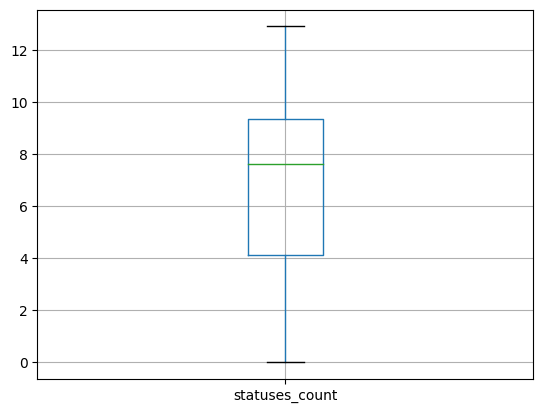

In [105]:
pd.DataFrame(log_feature_nobot).boxplot()
plt.show()

Number of Statuses count Nan for Non Bots:  0
count    5392.000000
mean        7.035529
std         2.683273
min         0.000000
25%         4.189655
50%         7.621685
75%         9.225894
max        12.898109
Name: statuses_count, dtype: float64


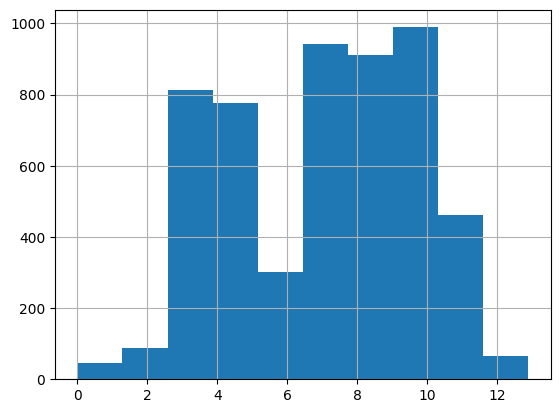

In [106]:
# remove Nan elements
nobot_users = users[users.bot==0]


nan_nobot_statuses_count_ids = nobot_users.statuses_count.isna()
print("Number of Statuses count Nan for Non Bots: ", np.sum(nan_bot_statuses_count))

median = log_feature_nobot.median()

nobot_users.loc[~nan_nobot_statuses_count_ids, "statuses_count"] = log_feature_nobot
nobot_users.loc[nan_nobot_statuses_count_ids, "statuses_count"] = median

users.loc[users.bot==0, "statuses_count"] = nobot_users

print(users.loc[users.bot==0, "statuses_count"].describe())

users.loc[users.bot==0, "statuses_count"].hist()
plt.show()

In [107]:
users[users.bot == 1].statuses_count[~null_statuses_count_ids].describe()

count      6116.000000
mean       1185.102845
std        5373.550630
min           0.000000
25%          32.000000
50%          53.000000
75%          78.000000
max      214410.000000
Name: statuses_count, dtype: float64

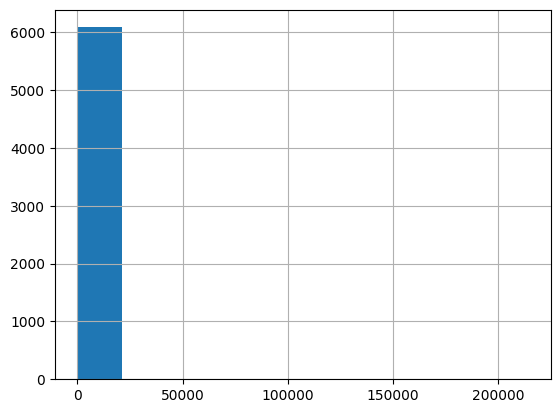

In [108]:
users[users.bot == 1].statuses_count[~null_statuses_count_ids].hist()
plt.show()

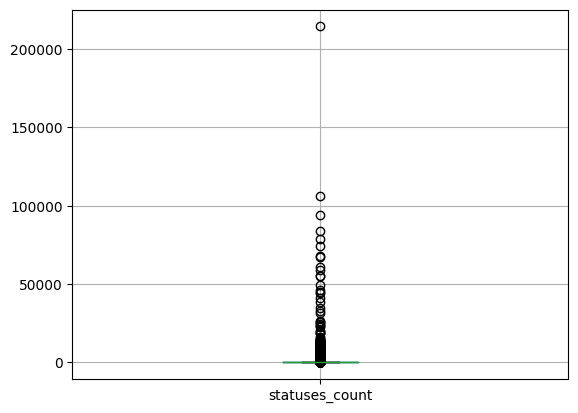

In [109]:
pd.DataFrame(users[users.bot == 1].statuses_count[~null_statuses_count_ids]).boxplot()
plt.show()

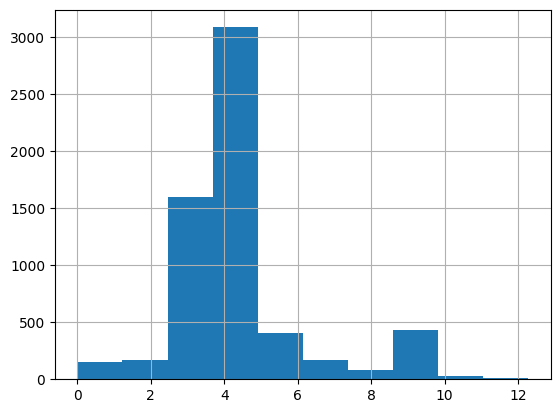

In [110]:
log_feature_bot = pd.Series(np.log(users[users.bot == 1].statuses_count[~null_statuses_count_ids] + 1))
log_feature_bot.hist()
plt.show()

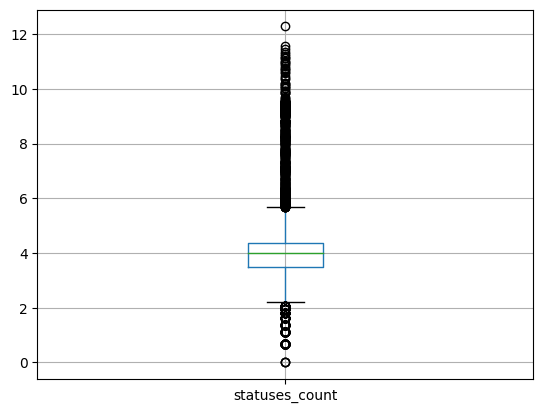

In [111]:
pd.DataFrame(log_feature_bot).boxplot()
plt.show()

# we can see that there are some outliers

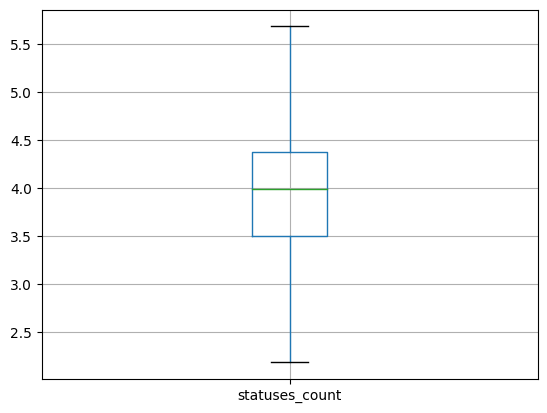

In [112]:
# removing outliers 
IQR = log_feature_bot.quantile(0.75) - log_feature_bot.quantile(0.25)
outlier_1 = log_feature_bot.quantile(0.75) + 1.5*IQR
outlier_2 = log_feature_bot.quantile(0.25) - 1.5*IQR

log_feature_bot[log_feature_bot > outlier_1] = outlier_1
log_feature_bot[log_feature_bot < outlier_2] = outlier_2

pd.DataFrame(log_feature_bot).boxplot()
plt.show()

Number of Statuses count Nan for Bots:  0
count    6116.000000
mean        4.041975
std         0.934210
min         2.187097
25%         3.496508
50%         3.988984
75%         4.369448
max         5.678858
Name: statuses_count, dtype: float64


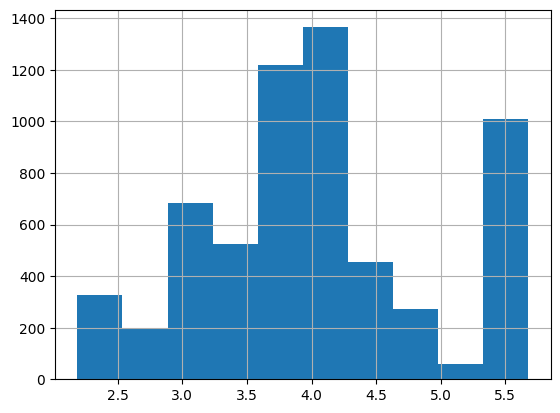

In [113]:
nan_bot_statuses_count = users[users.bot==1].statuses_count.isna()
print("Number of Statuses count Nan for Bots: ", np.sum(nan_bot_statuses_count))

#TODO: perche si schianta?
users.loc[users.bot==1, "statuses_count"] = log_feature_bot

print(users.loc[users.bot==1, "statuses_count"].describe())

users.loc[users.bot==1, "statuses_count"].hist()
plt.show()

# Tweets

In [114]:
tweets = pd.read_csv("dataset/tweets.csv", index_col=0)

In [3]:
tweets.head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


In [4]:
tweets.shape

(13664696, 9)

In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13664696 entries, 509354017856950272 to 486479812614451200
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         object
 1   retweet_count   object
 2   reply_count     object
 3   favorite_count  object
 4   num_hashtags    object
 5   num_urls        object
 6   num_mentions    object
 7   created_at      object
 8   text            object
dtypes: object(9)
memory usage: 1.0+ GB


## Index

In [6]:
# see the distribution of the lenght of the index
vlen = np.vectorize(lambda x: len(str(x)))
indexes = pd.Series(vlen(tweets.index.to_numpy()))

In [7]:
indexes.value_counts()

18    11768032
10      260089
17      257383
9       244274
8       243829
11      196364
15      190738
16      190716
7        73470
6        56160
5        54575
4        54307
3        53785
14       18930
13        1838
12         206
dtype: int64

In [8]:
# see if some indexes are duplicated
index_value_counts = tweets.index.value_counts()
print(index_value_counts)

dmy                   14
qsa                   12
jgm                   11
nis                   11
rdw                   11
                      ..
39790722903            1
2315433335             1
588516208669904896     1
582303273803243521     1
486479812614451200     1
Name: id, Length: 11672135, dtype: int64


In [9]:
# we can see that some index are not numbers and are duplicated
# which index are duplicated
index_value_counts[index_value_counts > 1]

dmy                   14
qsa                   12
jgm                   11
nis                   11
rdw                   11
                      ..
525746165019840513     2
314469529713512448     2
552992073792499712     2
427843738061533185     2
512636477051002880     2
Name: id, Length: 1969699, dtype: int64

In [10]:
# drop duplicated rows, dropping the row that have all the values duplicated not only the id
not_duplicated_tweets = tweets.drop_duplicates()

In [11]:
not_duplicated_tweets.shape

(11712093, 9)

In [12]:
print(f"removed rows : {13664696 - 11712093}")

removed rows : 1952603


In [13]:
index_value_counts = not_duplicated_tweets.index.value_counts()
print(index_value_counts)

dmy                   14
qsa                   12
mxo                   11
nis                   11
rdw                   11
                      ..
472403921332613120     1
583261659797426176     1
361607898599657473     1
582869903788634113     1
486479812614451200     1
Name: id, Length: 11671631, dtype: int64


In [14]:
not_duplicated_tweets.loc["dmy"]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
dmy,2882736641,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-24 17:07:08,NaN
dmy,138492664,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-29 13:07:05,NaN
dmy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-10 01:52:25,NaN
dmy,467136996,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-17 06:21:50,NaN
dmy,816485959,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-09 17:24:53,NaN
dmy,531252639,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-08 21:28:02,NaN
dmy,520977237,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-06 01:58:36,NaN
dmy,535901760,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-06 04:07:20,NaN
dmy,2351661655,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-07 04:55:39,NaN


In [15]:
not_duplicated_tweets.loc["qsa"]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
qsa,2969210974,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-16 07:17:30,NaN
qsa,466307762,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-20 06:17:27,NaN
qsa,521093819,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-08 17:46:58,NaN
qsa,614197225,NaN,NaN,NaN,NaN,NaN,NaN,2019-11-01 21:16:45,NaN
qsa,2528822924,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-12 01:56:45,NaN
qsa,2462247966,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-18 04:36:32,NaN
qsa,466426767,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-18 05:18:46,NaN
qsa,290054590,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-12 00:10:40,NaN
qsa,141883652,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-05 09:45:16,NaN


In [16]:
# we can see strange entries for non numerical indexes, try to eliminate them
numerical_indexes_ids = pd.Series(not_duplicated_tweets.index.str.isnumeric())

In [17]:
numerical_indexes_ids[numerical_indexes_ids.isna()] = False

In [18]:
# we can see the percentage of NaN element of the non numerical indexes
nan_element = np.sum(not_duplicated_tweets[numerical_indexes_ids.to_numpy()].isna())
total_element = not_duplicated_tweets[numerical_indexes_ids.to_numpy()].shape[0]

print("Number of NaN element in the non numeric indexed tweets: ", nan_element)
print("Total Number of element in the non numeric indexed tweets: ", total_element)

ratio_per_column = nan_element/total_element

print("Ratio of the Nan elements per column: ", ratio_per_column)

print("Ratio of the Nan elements per column: ", ratio_per_column.mean())

# the percentage of the Nan elements is too much, we can't drop that rows

Number of NaN element in the non numeric indexed tweets:  user_id           188364
retweet_count     342974
reply_count       496271
favorite_count    496378
num_hashtags      804930
num_urls          497125
num_mentions      650170
created_at             0
text              397261
dtype: int64
Total Number of element in the non numeric indexed tweets:  11278233
Ratio of the Nan elements per column:  user_id           0.016702
retweet_count     0.030410
reply_count       0.044003
favorite_count    0.044012
num_hashtags      0.071370
num_urls          0.044078
num_mentions      0.057648
created_at        0.000000
text              0.035224
dtype: float64
Ratio of the Nan elements per column:  0.03816075522547627


In [19]:
# we can see the percentage of NaN element of the non unique indexes
duplicated_index = index_value_counts[index_value_counts > 1].index.to_numpy()

nan_element = np.sum(not_duplicated_tweets.loc[duplicated_index].isna())
total_element = not_duplicated_tweets.loc[duplicated_index].shape[0]

print("Number of NaN element in the non unique indexed tweets: ", nan_element)
print("Total Number of element in the non unique indexed tweets: ", total_element)

ratio_per_column = nan_element/total_element

print("Ratio of the Nan elements per column: ", ratio_per_column)

print("Ratio of the Nan elements per column: ", ratio_per_column.mean())

# the percentage of the Nan elements is very high, we can drop that rows

Number of NaN element in the non numeric indexed tweets:  user_id            3847
retweet_count     25452
reply_count       38934
favorite_count    38805
num_hashtags      52393
num_urls          38820
num_mentions      47294
created_at            0
text              37501
dtype: int64
Total Number of element in the non numeric indexed tweets:  58060
Ratio of the Nan elements per column:  user_id           0.066259
retweet_count     0.438374
reply_count       0.670582
favorite_count    0.668360
num_hashtags      0.902394
num_urls          0.668619
num_mentions      0.814571
created_at        0.000000
text              0.645901
dtype: float64
Ratio of the Nan elements per column:  0.5416733647184904


In [25]:
not_duplicated_tweets = not_duplicated_tweets.drop(duplicated_index)

In [26]:
tweets = not_duplicated_tweets

In [28]:
tweets.head()

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
id,,,,,,,,,
509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


## User_id

In [55]:
tweets.user_id.value_counts()

491630583     3929
497404180     3920
1693274954    3906
164940888     3904
157029836     3903
              ... 
f5d2             1
jy3l1            1
9a8wb95x4        1
ql8aw            1
tzn9s6bwj        1
Name: user_id, Length: 222285, dtype: int64

In [56]:
unique_user_id = tweets.user_id.unique()
print(len(unique_user_id))

222286


In [57]:
numeric_user_id = pd.Series(tweets.user_id.str.isnumeric())
numeric_user_id[numeric_user_id.isna()] = False

valid_ids = numeric_user_id

In [58]:
print(f"numerical ids {np.sum(numeric_user_id)}")

numerical ids 11278087


In [59]:
value_counts_number_user_id = tweets.user_id[numeric_user_id].value_counts()
print(value_counts_number_user_id)

491630583     3929
497404180     3920
1693274954    3906
164940888     3904
157029836     3903
              ... 
2583             1
25377            1
0629             1
4981             1
261              1
Name: user_id, Length: 12172, dtype: int64


In [77]:
# function to handle non negative numerical values and outliers

def function_handle_nnn(feature_name = None, upperscale_bound=1e7):
    
    print(f"Feature: {feature_name}")
    
    # valid numbers
    numerical_entries = pd.Series(tweets[feature_name].str.isnumeric())
    numerical_entries[numerical_entries.isna()] = False
    
    numeric_count = pd.to_numeric(tweets[feature_name], errors="coerce")
    
    
    na_ids_count = numeric_count.isna()
    inf_ids_count = numeric_count.apply(np.isinf)
    negative_ids_count = numeric_count.apply(lambda x: x<0)
    
    print(f"Number of NaN elements: {np.sum(na_ids_count)}")
    print(f"Number of inf elements: {np.sum(inf_ids_count)}")
    print(f"Number of negative elements: {np.sum(negative_ids_count)}", end="\n")

    valid_numbers = np.logical_or(na_ids_count, inf_ids_count)
    valid_numbers = ~np.logical_or(valid_numbers, negative_ids_count)
    valid_numbers = np.logical_and(valid_numbers, numerical_entries).astype(bool)
        
    description = numeric_count[valid_numbers].describe()
    print("Description:")
    print(description, end="\n")
    
    value_counts = numeric_count[valid_numbers].value_counts()
    print("Value counts:")
    print(value_counts, end="\n")
    
    # remove over upper bound numbers
    valid_counts = numeric_count[valid_numbers]
    valid_counts[valid_counts>upperscale_bound] = 0 #upperscale_bound
    value_counts = valid_counts.value_counts()
    print("No outscaled value counts:")
    print(value_counts, end="\n")
    
    numeric_count[valid_numbers] = valid_counts
    
    print("Histogram:")
    numeric_count[valid_numbers].hist()
    plt.show()
    
    # transform powerlaw distr with log(x + 1)
    log_transformed = pd.Series(np.log(numeric_count[valid_numbers] + 1))
    
    value_counts = log_transformed.value_counts()
    print("Log value counts:")
    print(value_counts, end="\n")
    
    print("Log Histogram:")
    log_transformed.hist()
    plt.show()
    
    # transform powerlaw distr standard scaler
    # standard_scaler = StandardScaler()
    # standard_transformed = pd.Series(standard_scaler.fit_transform(numeric_count[valid_numbers].to_numpy().reshape(-1, 1)).squeeze())
    
    # value_counts = standard_transformed.value_counts()
    # print("Std value counts:")
    # print(value_counts, end="\n")
    
    # print("Std Histogram:")
    # standard_transformed.hist()
    # plt.show()

    
    # remove outliers
    IQR = log_transformed.quantile(0.75) - log_transformed.quantile(0.25)
    outlier_value = log_transformed.quantile(0.75) + 1.5*IQR
    print("Outlier: ", outlier_value) # often 0, so use the 90 percentile, as described in the book
    outlier_value = log_transformed.quantile(0.90)
    print("90-esimo percentile: ", outlier_value)
    log_transformed[log_transformed>outlier_value] = outlier_value
    
    print("removed outliers", end="\n")
    
    # remove non valid numbers    
    median = standard_transformed.median()
    
    print(median)
    
    numeric_count[~valid_numbers] = median
    numeric_count[valid_numbers] = standard_transformed
    
    print("removed non valid numbers", end="\n")

    value_counts = numeric_count.value_counts()
    print("Value counts:")
    print(value_counts, end="\n")
        
    pd.DataFrame(numeric_count).boxplot()
    plt.show()
    
    return valid_numbers, numeric_count

## Retweet_count

Feature: retweet_count
Number of NaN elements: 625456
Number of inf elements: 1
Number of negative elements: 0
Description:
count    1.108655e+07
mean     6.030983e+02
std      7.155408e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      2.295320e+08
Name: retweet_count, dtype: float64
Value counts:
0.0         8009071
1.0          996198
2.0          303643
3.0          153207
4.0           95024
             ...   
102605.0          1
79397.0           1
18281.0           1
78469.0           1
376246.0          1
Name: retweet_count, Length: 45773, dtype: int64
No outscaled value counts:
0.0         8009073
1.0          996198
2.0          303643
3.0          153207
4.0           95024
             ...   
91925.0           1
41452.0           1
108053.0          1
188080.0          1
376246.0          1
Name: retweet_count, Length: 45771, dtype: int64
Histogram:


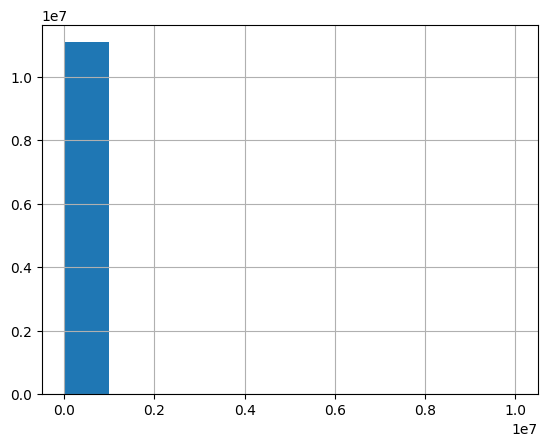

Log value counts:
0.000000     8009073
0.693147      996198
1.098612      303643
1.386294      153207
1.609438       95024
              ...   
11.428739          1
10.632316          1
11.590386          1
12.144628          1
12.838001          1
Name: retweet_count, Length: 45771, dtype: int64
Log Histogram:


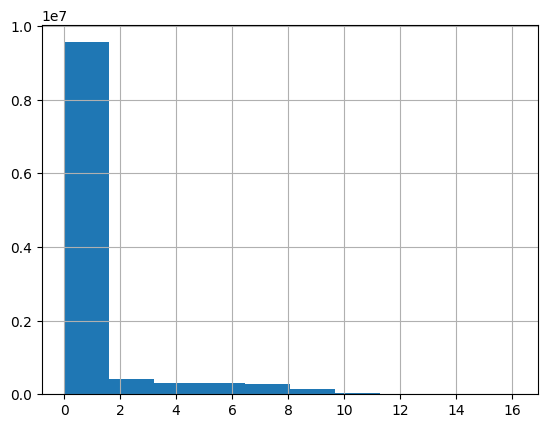

Std value counts:
-0.038154     8009073
-0.038088      996198
-0.038022      303643
-0.037957      153207
-0.037891       95024
               ...   
 6.020768           1
 2.694012           1
 7.083789           1
 12.358495          1
 24.760813          1
Length: 45771, dtype: int64
Std Histogram:


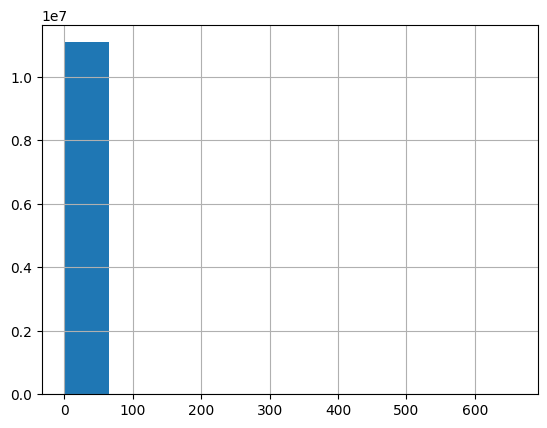

Outlier:  -0.03798949934136452
90-esimo percentile:  -0.036506488841958
removed outliers
-0.03815427828574303
removed non valid numbers
Value counts:
-0.038154    8634615
-0.036506    1111109
-0.038088     996198
-0.038022     303643
-0.037957     153207
-0.037891      95024
-0.037825      66145
-0.037759      49620
-0.037693      39352
-0.037627      32700
-0.037561      27489
-0.037495      23696
-0.037429      21142
-0.037363      18624
-0.037297      17221
-0.037232      15289
-0.037166      13953
-0.037100      12870
-0.037034      12029
-0.036968      11489
-0.036902      10803
-0.036836      10353
-0.036770       9477
-0.036704       9142
-0.036638       8759
-0.036572       8144
Name: retweet_count, dtype: int64


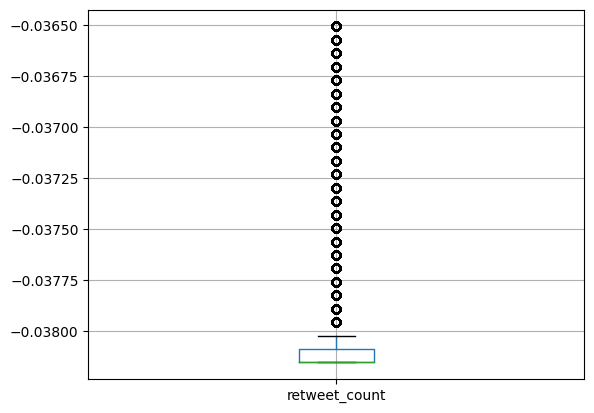

In [78]:
valid_numbers_retweets, cleaned_retweet_count = function_handle_nnn("retweet_count")
valid_ids = np.logical_and(valid_ids, valid_numbers_retweets)

## reply count

Feature: reply_count
Number of NaN elements: 809499
Number of inf elements: 1
Number of negative elements: 0
Description:
count    9.858197e+06
mean     5.595091e+00
std      1.422652e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.458600e+07
Name: reply_count, dtype: float64
Value counts:
0.0       9841098
1.0         13093
2.0          1207
3.0           421
4.0           209
           ...   
436.0           1
508.0           1
2755.0          1
218.0           1
178.0           1
Name: reply_count, Length: 658, dtype: int64
No outscaled value counts:
0.0     9841791
1.0       13093
2.0        1207
3.0         421
4.0         209
         ...   
80.0          1
96.0          1
82.0          1
67.0          1
98.0          1
Name: reply_count, Length: 96, dtype: int64
Histogram:


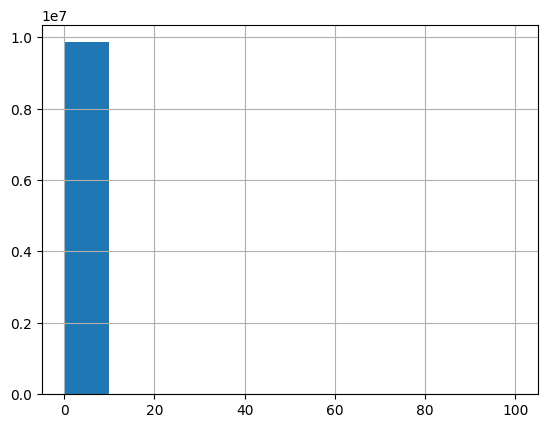

Log value counts:
0.000000    9841791
0.693147      13093
1.098612       1207
1.386294        421
1.609438        209
             ...   
4.394449          1
4.574711          1
4.418841          1
4.219508          1
4.595120          1
Name: reply_count, Length: 96, dtype: int64
Log Histogram:


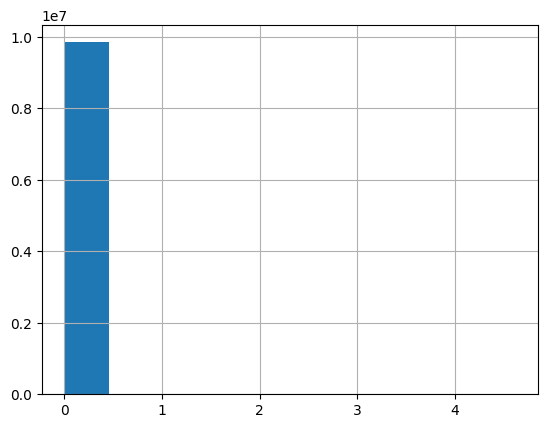

Std value counts:
-0.013747      9841791
 2.744234        13093
 5.502214         1207
 8.260195          421
 11.018176         209
                ...   
 220.624700          1
 264.752390          1
 226.140661          1
 184.770953          1
 270.268351          1
Length: 96, dtype: int64
Std Histogram:


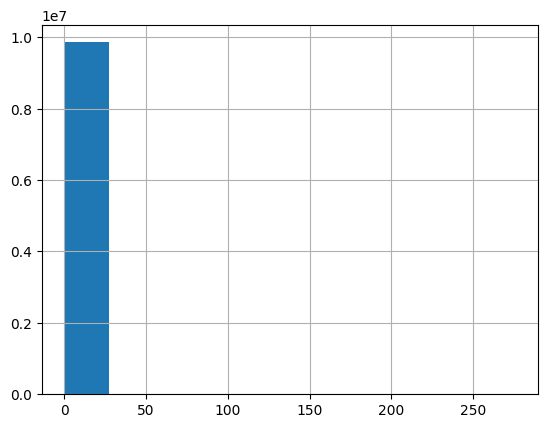

Outlier:  -0.01374682329735993
90-esimo percentile:  -0.01374682329735993
removed outliers
-0.01374682329735993
removed non valid numbers
Value counts:
-0.013747    11712093
Name: reply_count, dtype: int64


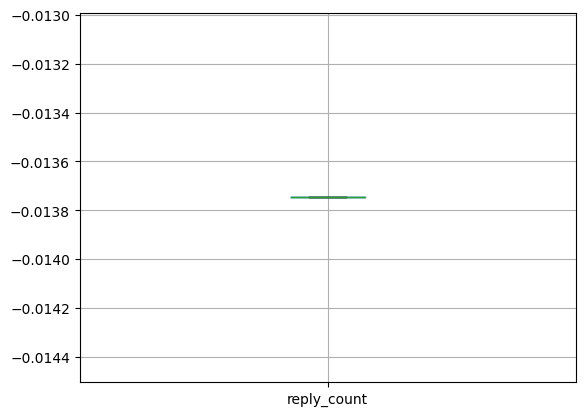

In [79]:
valid_numbers_reply, cleaned_reply_count = function_handle_nnn("reply_count")
valid_ids = np.logical_and(valid_ids, valid_numbers_reply)

## Favorite count

Feature: favorite_count
Number of NaN elements: 808096
Number of inf elements: 0
Number of negative elements: 1
Description:
count    9.858186e+06
mean     5.251282e+01
std      1.532583e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.810824e+08
Name: favorite_count, dtype: float64
Value counts:
0.0       7902583
1.0       1175557
2.0        339831
3.0        152983
4.0         83737
           ...   
8762.0          1
4894.0          1
358.0           1
3370.0          1
3063.0          1
Name: favorite_count, Length: 1573, dtype: int64
No outscaled value counts:
0.0       7902584
1.0       1175557
2.0        339831
3.0        152983
4.0         83737
           ...   
8762.0          1
4894.0          1
358.0           1
3370.0          1
3063.0          1
Name: favorite_count, Length: 1572, dtype: int64
Histogram:


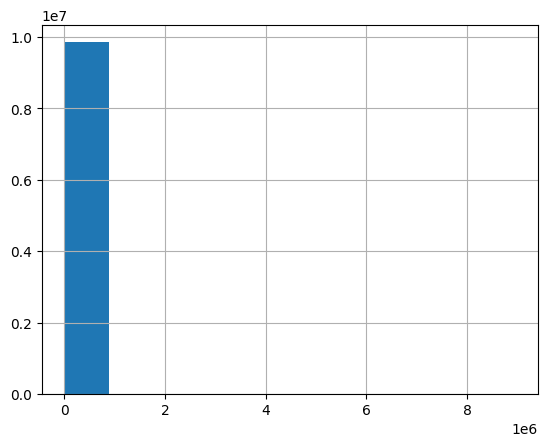

Log value counts:
0.000000    7902584
0.693147    1175557
1.098612     339831
1.386294     152983
1.609438      83737
             ...   
9.078294          1
8.495970          1
5.883322          1
8.122965          1
8.027477          1
Name: favorite_count, Length: 1572, dtype: int64
Log Histogram:


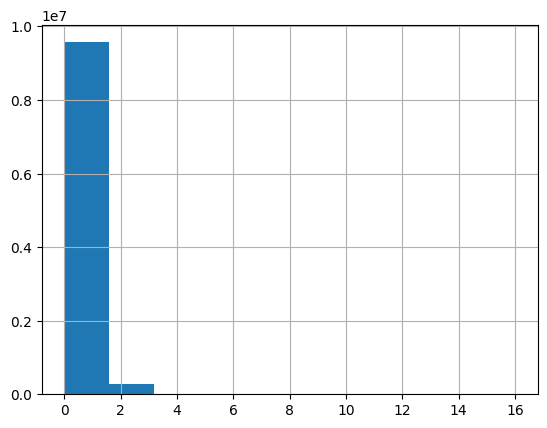

Std value counts:
-0.001112    7902584
-0.000812    1175557
-0.000513     339831
-0.000213     152983
 0.000086      83737
              ...   
 2.622722          1
 1.464426          1
 0.106094          1
 1.008055          1
 0.916122          1
Length: 1572, dtype: int64
Std Histogram:


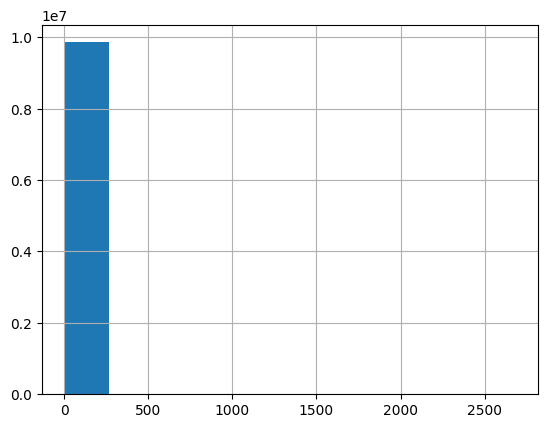

Outlier:  -0.0011117377310316326
90-esimo percentile:  -0.0008122816748622879
removed outliers
-0.0011117377310316326
removed non valid numbers
Value counts:
-0.001112    9756491
-0.000812    1955602
Name: favorite_count, dtype: int64


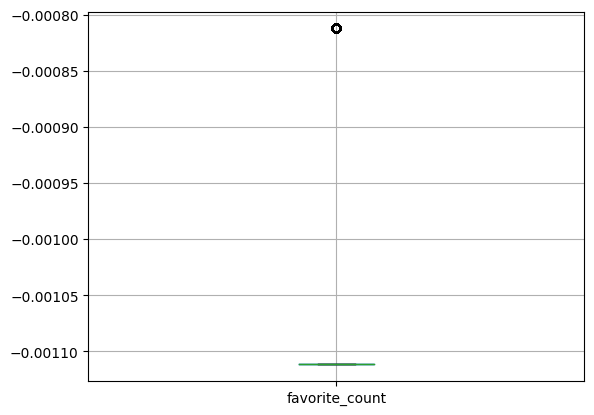

In [80]:
valid_numbers_favorite, cleaned_favorite_count = function_handle_nnn("favorite_count")
valid_ids = np.logical_and(valid_ids, valid_numbers_favorite)

## num hashtags

Feature: num_hashtags
Number of NaN elements: 1163661
Number of inf elements: 0
Number of negative elements: 0
Description:
count    9.857979e+06
mean     1.352928e+00
std      2.199587e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.747961e+06
Name: num_hashtags, dtype: float64
Value counts:
0.0       8738886
1.0        761080
2.0        225976
3.0         73640
4.0         27020
           ...   
1847.0          1
215.0           1
3423.0          1
8873.0          1
949.0           1
Name: num_hashtags, Length: 345, dtype: int64
No outscaled value counts:
0.0     8739238
1.0      761080
2.0      225976
3.0       73640
4.0       27020
5.0       13616
6.0        7349
7.0        4351
8.0        2328
9.0        1580
10.0        886
11.0        393
12.0        221
13.0        121
14.0         68
15.0         34
16.0         16
17.0         10
18.0          9
28.0          9
20.0          8
22.0          6
23.0          4
25.0        

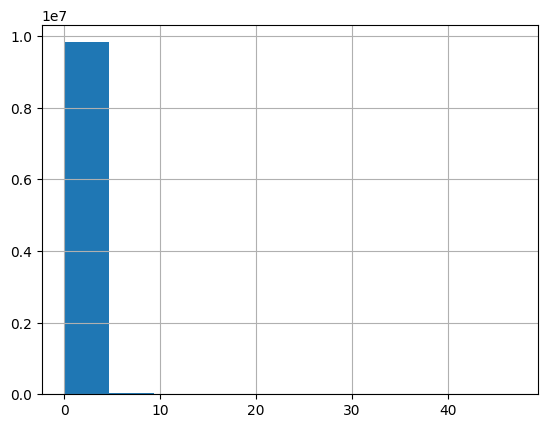

Log value counts:
0.000000    8739238
0.693147     761080
1.098612     225976
1.386294      73640
1.609438      27020
1.791759      13616
1.945910       7349
2.079442       4351
2.197225       2328
2.302585       1580
2.397895        886
2.484907        393
2.564949        221
2.639057        121
2.708050         68
2.772589         34
2.833213         16
2.890372         10
2.944439          9
3.367296          9
3.044522          8
3.135494          6
3.178054          4
3.258097          3
3.218876          3
3.091042          3
3.663562          2
2.995732          2
3.332205          1
3.871201          1
3.828641          1
Name: num_hashtags, dtype: int64
Log Histogram:


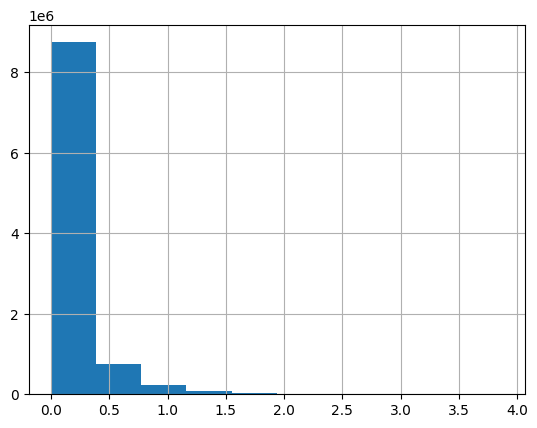

Std value counts:
-0.284090     8739238
 1.327232      761080
 2.938554      225976
 4.549876       73640
 6.161198       27020
 7.772520       13616
 9.383842        7349
 10.995164       4351
 12.606486       2328
 14.217808       1580
 15.829130        886
 17.440452        393
 19.051774        221
 20.663096        121
 22.274418         68
 23.885740         34
 25.497061         16
 27.108383         10
 28.719705          9
 44.832925          9
 31.942349          8
 35.164993          6
 36.776315          4
 39.998959          3
 38.387637          3
 33.553671          3
 60.946144          2
 30.331027          2
 43.221603          1
 75.448042          1
 72.225398          1
dtype: int64
Std Histogram:


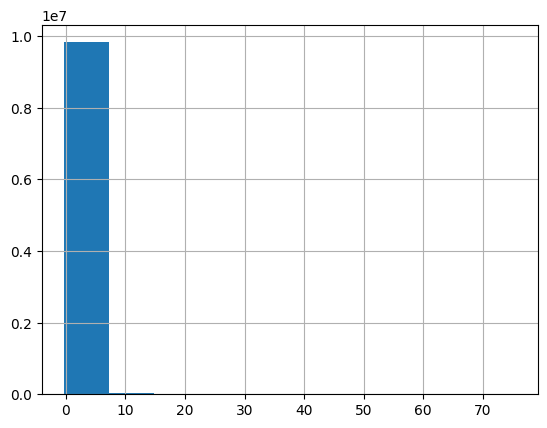

Outlier:  -0.284089510060666
90-esimo percentile:  1.327232426724786
removed outliers
-0.284089510060666
removed non valid numbers
Value counts:
-0.284090    10593352
 1.327232     1118741
Name: num_hashtags, dtype: int64


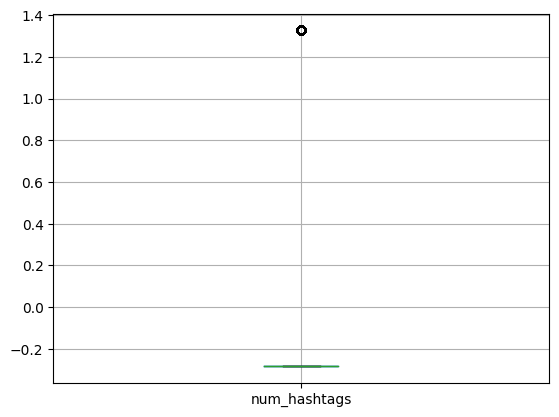

In [81]:
valid_numbers_hashtags, cleaned_num_hashtags = function_handle_nnn("num_hashtags", 50)
valid_ids = np.logical_and(valid_ids, valid_numbers_hashtags)

## Num urls

Feature: num_urls
Number of NaN elements: 808941
Number of inf elements: 0
Number of negative elements: 0
Description:
count    9.858195e+06
mean     8.661910e+00
std      1.894426e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.859340e+07
Name: num_urls, dtype: float64
Value counts:
0.0        8258702
1.0        1577953
2.0          19849
3.0            778
4.0            259
            ...   
523.0            1
18.0             1
2560.0           1
24087.0          1
260.0            1
Name: num_urls, Length: 508, dtype: int64
No outscaled value counts:
0.0     8259269
1.0     1577953
2.0       19849
3.0         778
4.0         259
5.0          52
6.0          25
29.0          2
12.0          2
11.0          1
22.0          1
18.0          1
7.0           1
28.0          1
14.0          1
Name: num_urls, dtype: int64
Histogram:


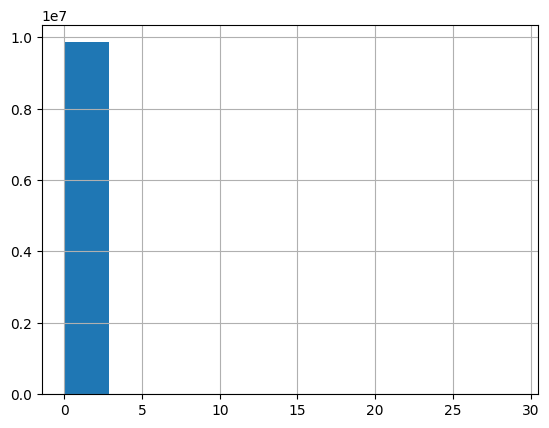

Log value counts:
0.000000    8259269
0.693147    1577953
1.098612      19849
1.386294        778
1.609438        259
1.791759         52
1.945910         25
3.401197          2
2.564949          2
2.484907          1
3.135494          1
2.944439          1
2.079442          1
3.367296          1
2.708050          1
Name: num_urls, dtype: int64
Log Histogram:


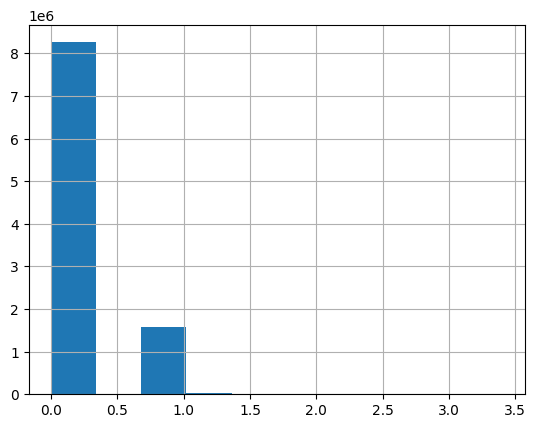

Std value counts:
-0.435277     8259269
 2.210884     1577953
 4.857045       19849
 7.503206         778
 10.149367        259
 12.795528         52
 15.441689         25
 76.303391          2
 31.318654          2
 28.672493          1
 57.780264          1
 47.195620          1
 18.087850          1
 73.657230          1
 36.610976          1
dtype: int64
Std Histogram:


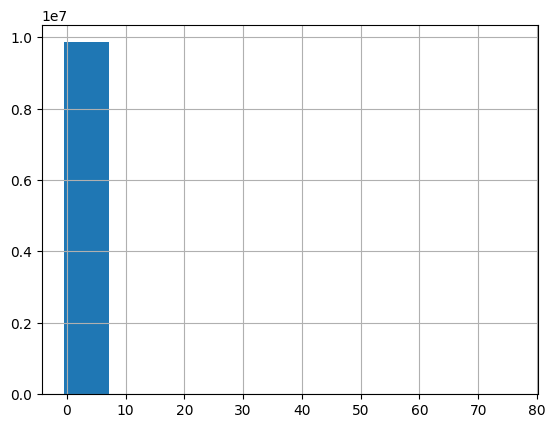

Outlier:  -0.4352773552788778
90-esimo percentile:  2.2108836260548044
removed outliers
-0.4352773552788778
removed non valid numbers
Value counts:
-0.435277    10113167
 2.210884     1598926
Name: num_urls, dtype: int64


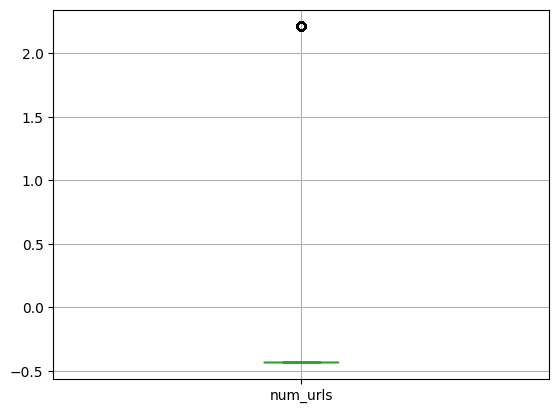

In [82]:
valid_urls_mentions, cleaned_num_urls = function_handle_nnn("num_urls", 30)
valid_ids = np.logical_and(valid_ids, valid_urls_mentions)

## Num mentions

Feature: num_mentions
Number of NaN elements: 987974
Number of inf elements: 0
Number of negative elements: 0
Description:
count    1.072406e+07
mean     1.176314e+00
std      5.381149e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      9.174080e+05
Name: num_mentions, dtype: float64
Value counts:
0.0       6394952
1.0       3476240
2.0        607604
3.0        147773
4.0         46994
           ...   
767.0           1
253.0           1
3249.0          1
48.0            1
4509.0          1
Name: num_mentions, Length: 435, dtype: int64
No outscaled value counts:
0.0     6395418
1.0     3476240
2.0      607604
3.0      147773
4.0       46994
5.0       21616
6.0       11815
7.0        6782
8.0        4541
9.0        2856
10.0       1685
11.0        614
12.0         94
13.0         11
23.0          2
22.0          2
15.0          2
14.0          2
18.0          1
25.0          1
24.0          1
17.0          1
Name: num_mentions, dtype: in

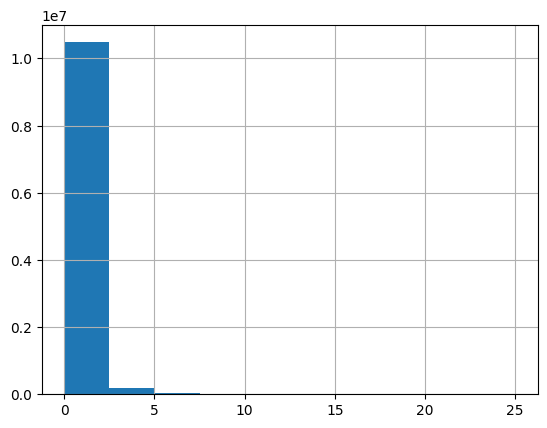

Log value counts:
0.000000    6395418
0.693147    3476240
1.098612     607604
1.386294     147773
1.609438      46994
1.791759      21616
1.945910      11815
2.079442       6782
2.197225       4541
2.302585       2856
2.397895       1685
2.484907        614
2.564949         94
2.639057         11
3.178054          2
3.135494          2
2.772589          2
2.708050          2
2.944439          1
3.258097          1
3.218876          1
2.890372          1
Name: num_mentions, dtype: int64
Log Histogram:


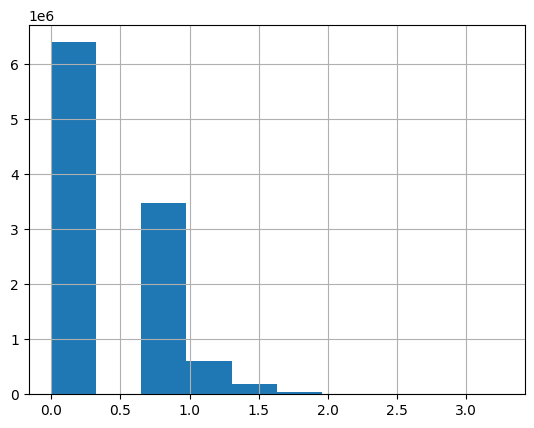

Std value counts:
-0.645520     6395418
 0.582690     3476240
 1.810901      607604
 3.039112      147773
 4.267323       46994
 5.495533       21616
 6.723744       11815
 7.951955        6782
 9.180165        4541
 10.408376       2856
 11.636587       1685
 12.864798        614
 14.093008         94
 15.321219         11
 27.603326          2
 26.375115          2
 17.777640          2
 16.549430          2
 21.462273          1
 30.059748          1
 28.831537          1
 20.234062          1
dtype: int64
Std Histogram:


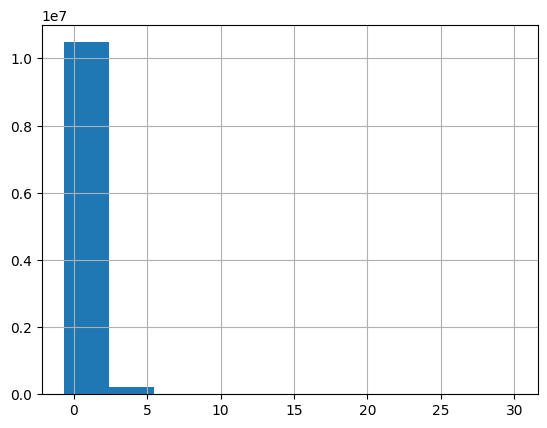

Outlier:  2.4250064230886577
90-esimo percentile:  0.5826903438681521
removed outliers
-0.645520375612185
removed non valid numbers
Value counts:
-0.64552    7383456
 0.58269    4328637
Name: num_mentions, dtype: int64


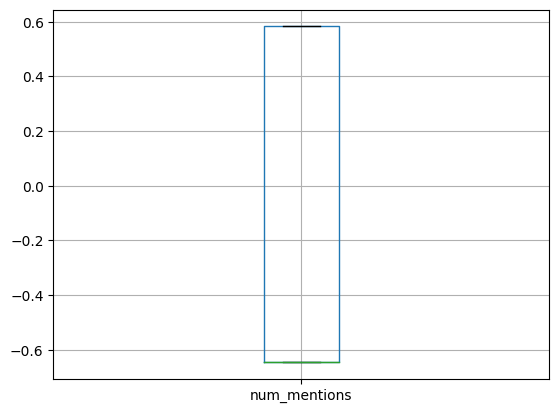

In [83]:
valid_numbers_mentions, cleaned_num_mentions = function_handle_nnn("num_mentions", 50)
valid_ids = np.logical_and(valid_ids, valid_numbers_mentions)

In [ ]:
# get the valid numerical rows
tweets = tweets[valid_ids]

In [19]:
tweets.shape

(11810201, 9)

In [20]:
tweets_noout = pd.DataFrame()
tweets_noout["retweet_count"] = cleaned_retweet_count
tweets_noout["reply_count"] = cleaned_reply_count
tweets_noout["favorite_count"] = cleaned_favorite_count
tweets_noout["num_hashtags"] = cleaned_num_hashtags
tweets_noout["num_urls"] = cleaned_num_ursl
tweets_noout["num_mentions"] = cleaned_num_mentions

## numerical correlations

In [46]:
numerical_cols = ["retweet_count", "reply_count", "favorite_count", "num_hashtags", "num_urls", "num_mentions"]

In [ ]:
sub_numerical_tweets = tweets[numerical_cols]

In [48]:
sub_numerical_tweets.head()

,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions
id,,,,,,
509354017856950272,0.0,0.0,0.0,0.0,0.0,0.0
583002592529121280,1.0,0.0,0.0,0.0,0.0,1.0
461498835362013185,0.0,0.0,0.0,0.0,0.0,1.0
528808127366692864,0.0,0.0,0.0,0.0,0.0,0.0
575336690904006656,2.5,0.0,0.0,0.0,0.0,1.0


In [57]:
sub_numerical_tweets = sub_numerical_tweets.astype(float)

In [ ]:
sub_numerical_tweets.sample(10000).corr()

## Created at

In [60]:
try:
    pd.to_datetime(tweets.created_at, format='%Y-%m-%d %H:%M:%S', errors='raise')
    # do something
    print("All the dates are ok!")
except ValueError as e:
    print(e)

All the dates are ok!


In [61]:
# prima della creazione di tweetter
tweets.created_at.min()

'1953-04-17 12:24:33'

In [62]:
# nel futuro
tweets.created_at.max()

'2040-04-27 11:03:25'